In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [76]:
df = pd.read_csv("all_train.csv")

In [77]:
df2 = pd.read_csv("all_test.csv")

In [78]:
df.index = range(1,123)
df2.index = range(123,261)

In [79]:
train = df[df.time<=52]
valid = df[(df.time<=104) & (df.time>52)]

In [80]:
train1 = train.TOTAL_TICKETS.values
valid1 = valid.TOTAL_TICKETS.values

In [81]:
train0 = df.TOTAL_TICKETS.values

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
history = [x for x in train1]
predictions = list()
# fit model
model = ARIMA(history, order=(52, 1, 4))
model_fit = model.fit()
# make prediction
for x in range(1,105):
    output = model_fit.predict(start=x, end=x)
    yhat = output[0]
    predictions.append(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


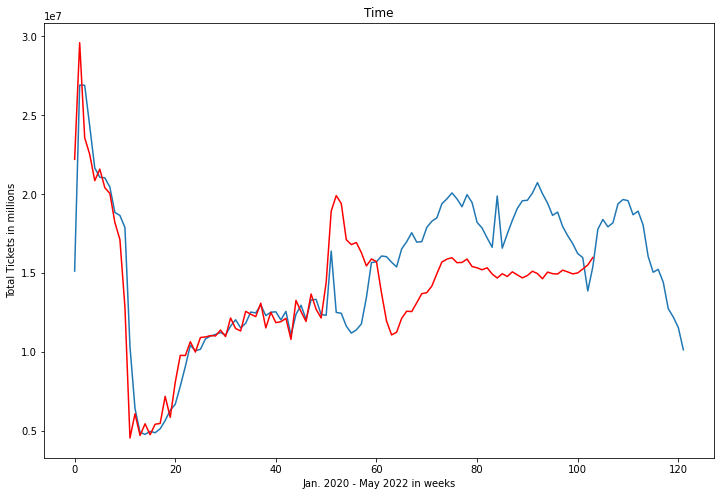

In [84]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.title('Time')
plt.xlabel('Jan. 2020 - May 2022 in weeks')
plt.ylabel('Total Tickets in millions')
plt.show()

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
train_ex1 = train["Oil Price"].values
valid_ex1 = valid["Oil Price"].values
train_ex2 = train["covid_policy"].values
valid_ex2 = valid["covid_policy"].values
ex1 = df["Oil Price"].values
ex2 = df["covid_policy"].values
ex11 = df2["Oil Price"].values
ex22 = df2["covid_policy"].values

In [87]:
history = [x for x in train1]
ext = [y for y in train_ex1]
# fit model
model = SARIMAX(history, exog=ext, order=(52, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=103, exog=[valid_ex1])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


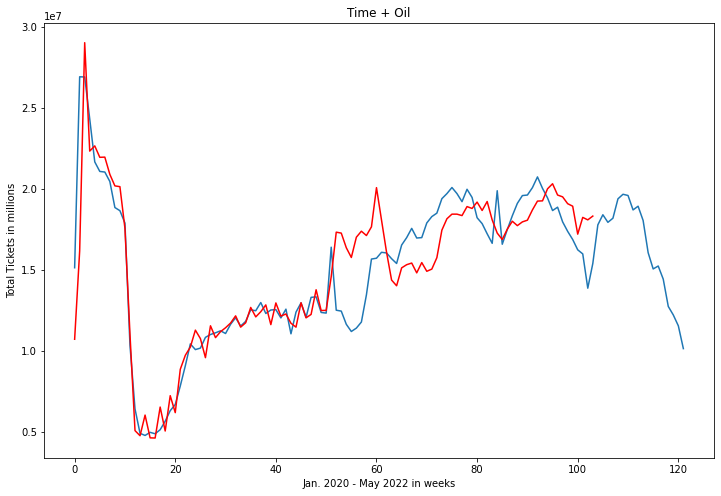

In [88]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.title('Time + Oil')
plt.xlabel('Jan. 2020 - May 2022 in weeks')
plt.ylabel('Total Tickets in millions')
plt.show()

In [89]:
train_ex12 = train[["Oil Price", "covid_policy"]].values
valid_ex12 = valid[["Oil Price", "covid_policy"]].values
ex3 = df[["Oil Price", "covid_policy"]].values
ex33 = df2[["Oil Price", "covid_policy"]].values

In [90]:
history = [x for x in train1]
ext = [y for y in train_ex12]
predictions = list()
# fit model
model = SARIMAX(history, exog=ext, order=(52, 1, 4), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=103, exog=[valid_ex12])
predictions = list(yhat)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


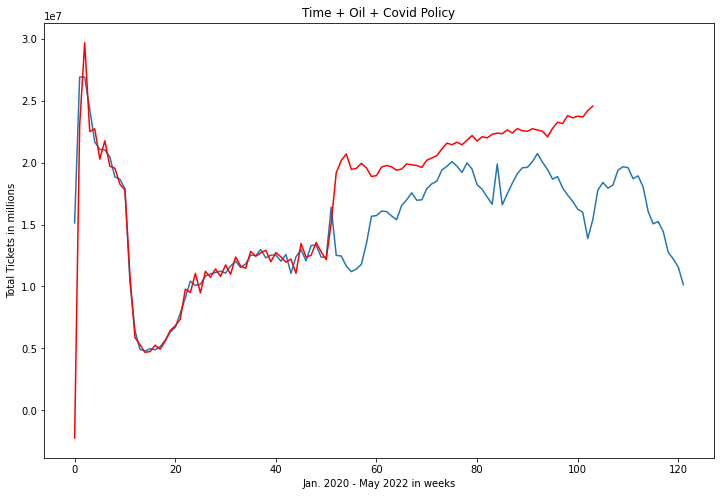

In [91]:
# forecasts
plt.figure(figsize=(12,8))
plt.plot(train0)
plt.plot(predictions, color='red')
plt.title('Time + Oil + Covid Policy')
plt.xlabel('Jan. 2020 - May 2022 in weeks')
plt.ylabel('Total Tickets in millions')
plt.show()